# Ejercicios Práctica Regresión 

$1$. Cargue el dataset `Auto.csv`
  1. Use la librería de `statsmodels` (específicamente `import statsmodels.formula.api as smf` y luego `smf.ols`) para realizar una regresión lineal simple con *mpg* como la variable respuesta y *horsepower* como el predictor (o descriptor). Use el método `summary()` para mostrar los resultados. Comente lo siguiente sobre los resultados:

    1. ¿Existe una relación entre el predictor y la respuesta?
    2. ¿Qué tan fuerte es la relación entre el predictor y la respuesta?
    3. ¿La relación entre el predictor y la respuesta es positiva o negativa?
    4. ¿Cuál es el *mpg* previsto asociado con una *horsepower* de 98? ¿Cuáles son los intervalos de confianza y predicción del 95% asociados?

  2. Grafique la respuesta vs el predictor. Use seaborn y/o matplotlib para mostrar la línea de regresión de mínimos cuadrados.
  
Sugerencia: para evitar inconvenientes con los missing values que se encuentran como "?", lea de la siguiente forma el dataset:

```python
    auto = pd.read_csv("Data/Auto.csv", na_values='?')
```

***Desarrollaremos estas preguntas en los siguientes procedimientos, puede encontrar las respuestas en negrita.***

In [2]:
# Importando todos los modulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-white')

In [3]:
auto = pd.read_csv("Data/Auto.csv", na_values='?')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [4]:
auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [6]:
# Importacion para usar la "notacion tipo formula" (similar a R)
import statsmodels.formula.api as smf

est = smf.ols('mpg ~ horsepower', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           7.03e-81
Time:                        20:44:40   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
est.pvalues

Intercept     1.220362e-187
horsepower     7.031989e-81
dtype: float64

## ¿Existe una relación entre el predictor y la respuesta?
    
**Sí. Podemos ver el p value es muchísimo menor a 0.05, indicando fuertemente que podemos rechazar la hipótesis nula y así decir que hay una relación. **


## ¿Qué tan fuerte es la relación entre el predictor y la respuesta?
    
   **Según el modelo, tenemos que aumentar una "unidad" de la variable horsepower está asociado con una disminución de 0.1578 "unidades" de la variable mpg. Además, podemos ver el estadístico R² en 0.606, lo que nos indica que una significante porción de los datos se ajusta al modelo.**

## ¿La relación entre el predictor y la respuesta es positiva o negativa?
    
   **Negativa.**
    
## ¿Cuál es el *mpg* previsto asociado con una *horsepower* de 98? ¿Cuáles son los intervalos de confianza y predicción del 95% asociados?
    
   **Supongamos un *horsepower* de 98 unidades.**
    
$$ y = \beta_0 + \beta_1x $$
$$ y = 39.9359 - 0.1578\times 98 $$

In [9]:
# Calculando manualmente
est.params[0] + est.params[1]*98

24.467077152512424

### Por lo tanto, se predice un *mpg* de **24.467** para un *horsepower* de 98.

**Ahora, calcularemos la predicción con statsmodel.**

In [10]:
# Se debe crear un Dataframe puesto que (la interfaz formula de) Statsmodels lo espera
X_new = pd.DataFrame({'horsepower': [98]})
X_new.head()

horsepower
0          98

In [11]:
# se usa el modelo para predecir un nuevo valor (produce una serie)
est.predict(X_new)

0    24.467077
dtype: float64

**De esta manera confirmamos nuestro cálculo.**

**Así mismo, tenemos que el intervalo de confianza y predicción asociados para el 95% es: **

In [20]:
predic = est.get_prediction(X_new)

In [21]:
predic.summary_frame(alpha=0.05)

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758

## Grafique la respuesta vs el predictor. Use `seaborn` y/o `matplotlib` para mostrar la línea de regresión de mínimos cuadrados.


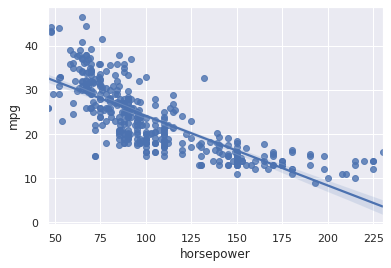

In [8]:
sns.set(color_codes=True)
sns.regplot(x="horsepower", y="mpg", data=auto);

$2$. Reproduzca el análisis hecho en el notebook `Regresion-Lineal-Scikit-Learn.ipynb` para el dataset de boston completo. Para cargar el dataset (que viene por defecto en scikit-learn) ejecute:
 
 ```python

    from sklearn.datasets import load_boston
    import pandas as pd

    boston = load_boston()
    print(boston.DESCR)

    df = pd.DataFrame(boston.data, columns=boston.feature_names)
    df['MEDV'] = boston.target
    df.head()

 ```
 
 Tenga presente que los nombres de los predictores son diferentes al del ejemplo. Las variables están en proporciones (por ejm de 1000). Por ejemplo, la variable respuesta anteriormente se llamaba *Price*, ahora es *MEDV*.

## **Anexo en el archivo punto2.ipynb**

$3$. Este ejercicio involucra el uso de regresión lineal múltiple sobre el dataset `Auto`

  a. Grafique una matriz de dispersión que incluya todas las variables en el conjunto de datos.
    
  b. Calcule la matriz de correlaciones entre las variables usando el método `corr()` de Pandas. Luego grafiquela usando `seaborn`.
    
  c. Use la librería de `statsmodels` (específicamente `import statsmodels.formula.api as smf` y luego `smf.ols`)  para realizar una regresión lineal múltiple con *mpg* como respuesta y todas las demás variables, excepto la variable `name`, como predictores. Use el método de summary() para imprimir los resultados. Comenta sobre el resultado:
    
    - ¿Existe una relación entre los predictores y la respuesta?
    - ¿Qué predictores parecen tener una relación estadísticamente significativa con la respuesta?
    - ¿Qué sugiere el coeficiente para la variable del año?
    - Use  multiplicaciones para ajustar  modelos de regresión lineal con efectos de interacción. ¿Alguna interacción parece ser estadísticamente significativa?. 
   
d.  Pruebe algunas transformaciones diferentes de las variables, como $\log{X}, \sqrt{X}, X^2$. Comente los hallazgos. Sug: se puede usar statmodels pero también scikit-learn con `sklearn.preprocessing.PolynomialFeatures` ( con los parámetros interaction_only=True,include_bias = False).

In [22]:
auto = pd.read_csv("Data/Auto.csv", na_values='?')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


## Grafique una matriz de dispersión que incluya todas las variables en el conjunto de datos.

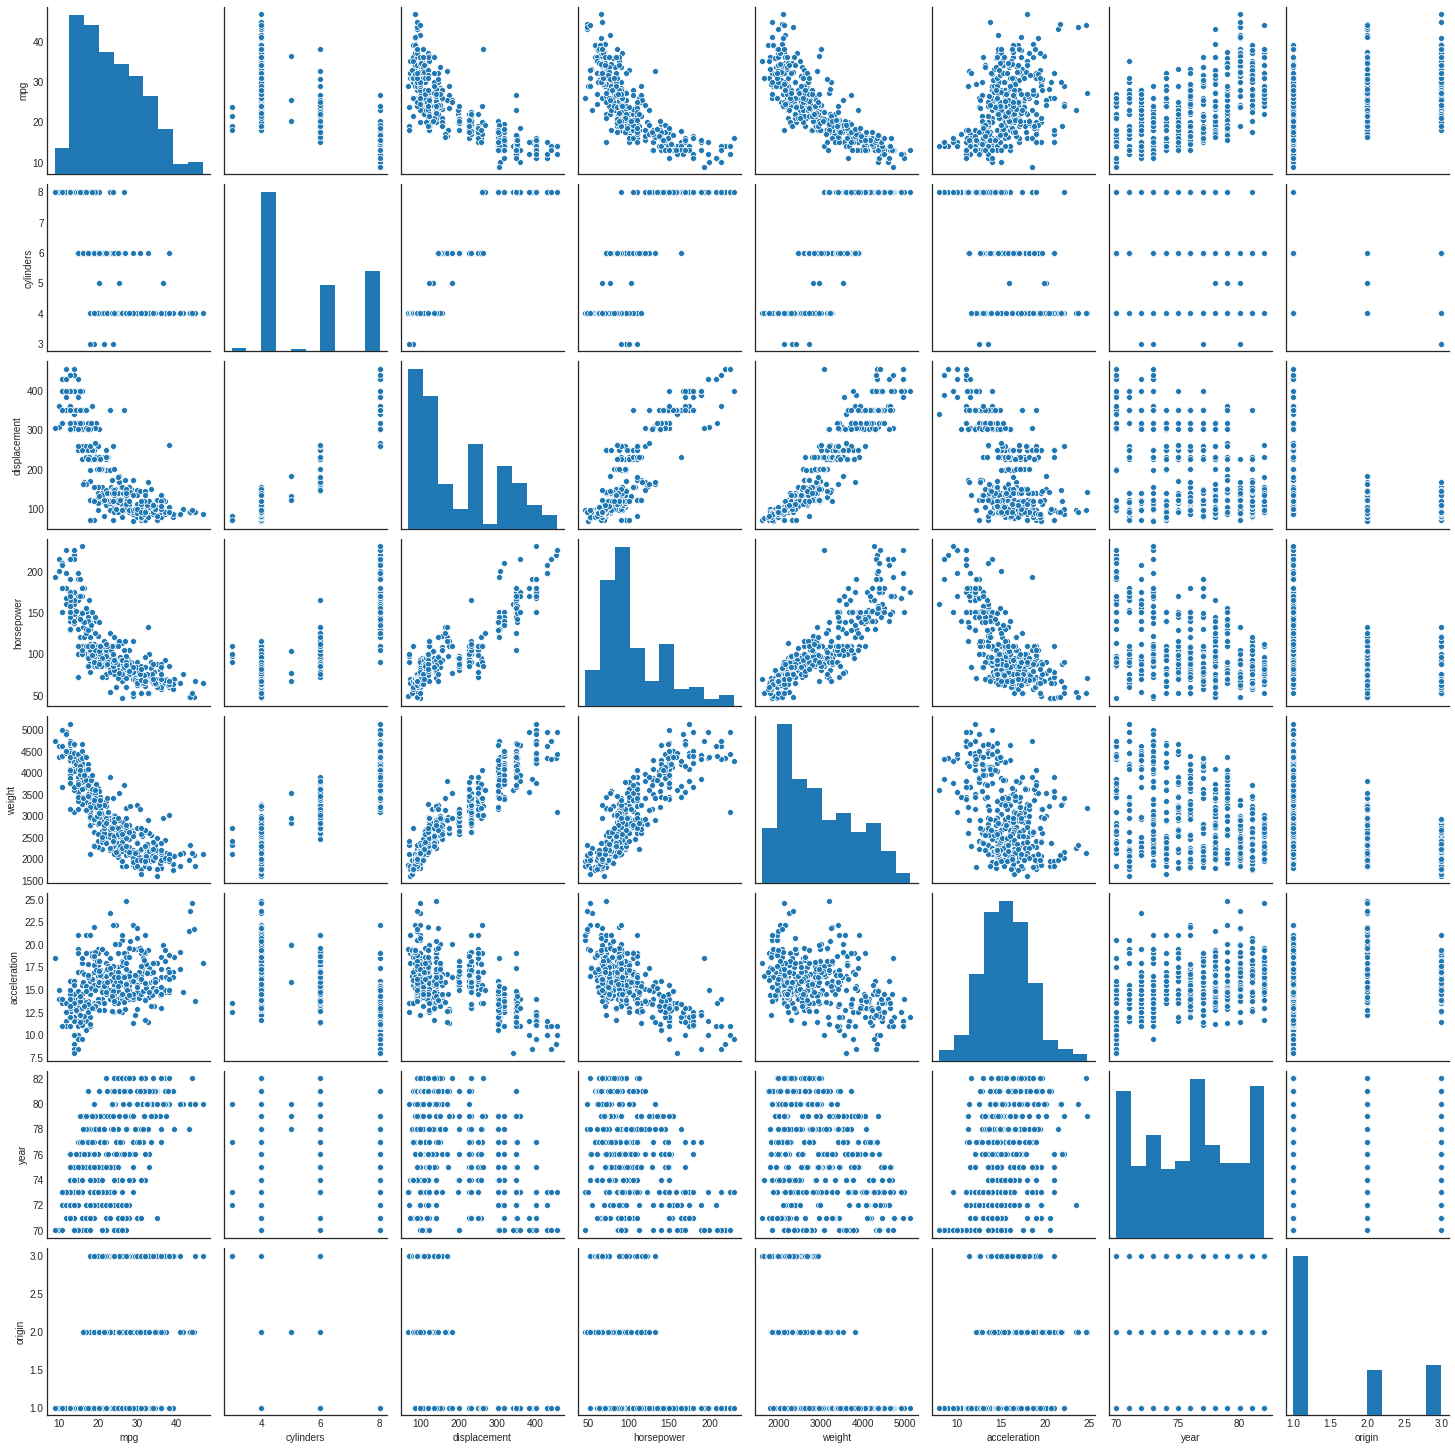

In [23]:
sns.pairplot(auto)

## Calcule la matriz de correlaciones entre las variables usando el método `corr()` de Pandas. Luego grafiquela usando `seaborn`.

In [9]:
auto.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.776260     -0.804443   -0.778427 -0.831739   
cylinders    -0.776260   1.000000      0.950920    0.842983  0.897017   
displacement -0.804443   0.950920      1.000000    0.897257  0.933104   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831739   0.897017      0.933104    0.864538  1.000000   
acceleration  0.422297  -0.504061     -0.544162   -0.689196 -0.419502   
year          0.581469  -0.346717     -0.369804   -0.416361 -0.307900   
origin        0.563698  -0.564972     -0.610664   -0.455171 -0.581265   

              acceleration      year    origin  
mpg               0.422297  0.581469  0.563698  
cylinders        -0.504061 -0.346717 -0.564972  
displacement     -0.544162 -0.369804 -0.610664  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.419502 -0.307900 -0.581265  
acceleration      1.000000  0.282901  0.210084  
year              0.282901  1.000000  0.184314  
origin            0.210084  0.184314  1.000000

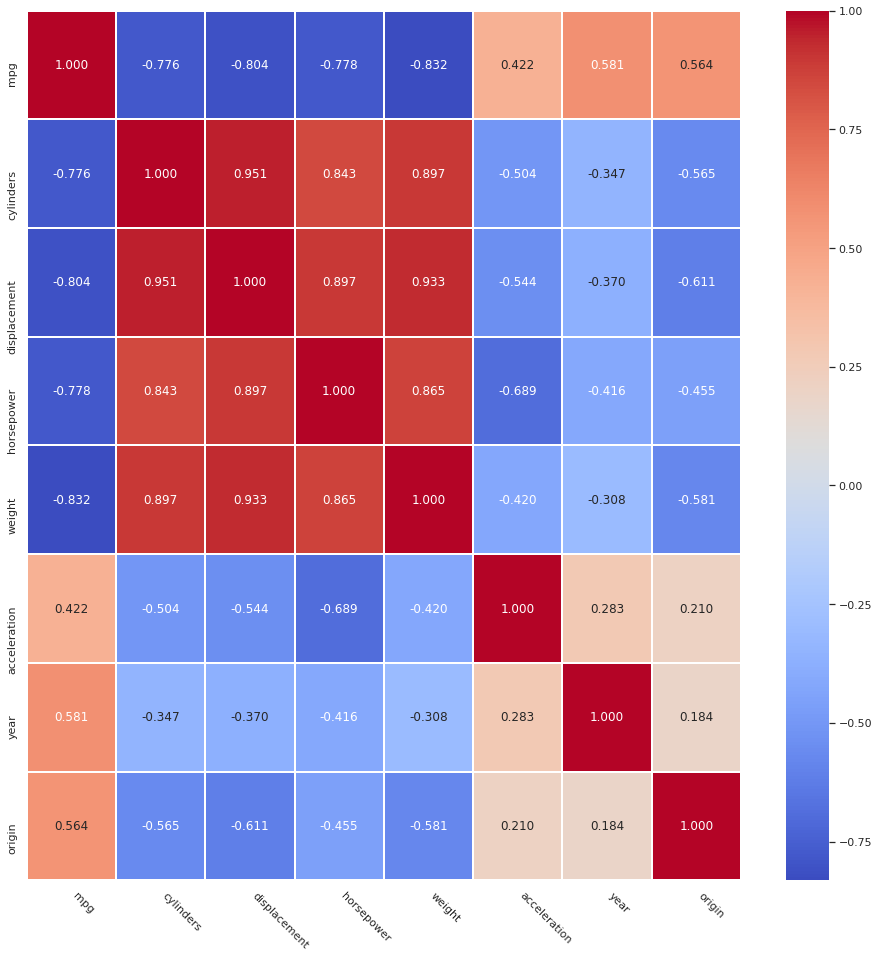

In [10]:
plt.figure(figsize=(16, 16))
sns.heatmap(auto.corr(),cmap='coolwarm',annot=True, fmt="1.3f", linewidths=1)
plt.xticks(rotation=-45, ha = 'left') 
plt.show()

In [12]:
# Importacion para usar la "notacion tipo formula" (similar a R)
import statsmodels.formula.api as smf

X = auto[['horsepower','year','cylinders','displacement','weight','acceleration', 'origin']]
y = auto['mpg']
est = smf.ols('y ~ X', auto).fit()
est.summary(xname=['Interception', 'horsepower','year','cylinders','displacement','weight','acceleration', 'origin']).tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [13]:
est.pvalues

Intercept    2.401841e-04
X[0]         2.196328e-01
X[1]         3.055983e-39
X[2]         1.277965e-01
X[3]         8.444649e-03
X[4]         7.874953e-21
X[5]         4.154780e-01
X[6]         4.665681e-07
dtype: float64

##  ¿Existe una relación entre los predictores y la respuesta?

**Solo algunos predictores tienen relación con la respuesta, presentaremos cada caso a continuación:**

**Dejando todas las demás variables sin alterar, considere:*

**Según el modelo, la variable *horsepower* NO tiene relación con mpg, pues su p value es mayor a 0.05, lo cual no es estadísticamente signicante y es evidencia fuerte para la hipótesis nula.**

**Según el modelo, la variable *year* SÍ tiene relación con mpg, pues su pvalue es menor a 0.05, lo cual es estadísticamente signicante y es evidencia fuerte para rechazar la hipótesis nula.**

**Según el modelo, la variable *cylinders* NO tiene relación con mpg, pues su p value es mayor a 0.05, lo cual no es estadísticamente signicante y es evidencia fuerte para la hipótesis nula.**

**Según el modelo, la variable *displacement* SÍ tiene relación con mpg, pues su pvalue es menor a 0.05, lo cual es estadísticamente signicante y es evidencia fuerte para rechazar la hipótesis nula.**

**Según el modelo, la variable *weight* SÍ tiene relación con mpg, pues su pvalue es menor a 0.05, lo cual es estadísticamente signicante y es evidencia fuerte para rechazar la hipótesis nula.**

**Según el modelo, la variable *acceleration* NO tiene relación con mpg, pues su p value es mayor a 0.05, lo cual no es estadísticamente signicante y es evidencia fuerte para la hipótesis nula.**

**Según el modelo, la variable *origin* SÍ tiene relación con mpg, pues su pvalue es menor a 0.05, lo cual es estadísticamente signicante y es evidencia fuerte para rechazar la hipótesis nula.**

## ¿Qué predictores parecen tener una relación estadísticamente significativa con la respuesta?

**Según el modelo y los p values obtenidos, podemos ver que los predictores *year, displacement, weight, origin* parecen tener una relación estadísticamente significativa con la respuesta.

## ¿Qué sugiere el coeficiente para la variable del año?

**Sugiere que entre más nuevo sea el modelo/año del automovil, se verá un aumento de 0.7508 "unidades" en millas por galon (mpg). Pero ojo, si observamos el scatter plot con la regresión (siguiente figura) podemos observar que la dispersión de los datos es muy grande, y existen varios mpg en distintos años, dado que hay varios casos de automoviles.**


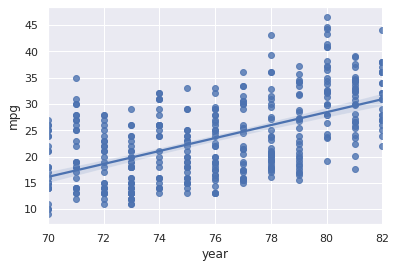

In [67]:
sns.set(color_codes=True)
sns.regplot(x="year", y="mpg", data=auto);

## Use  multiplicaciones para ajustar  modelos de regresión lineal con efectos de interacción. ¿Alguna interacción parece ser estadísticamente significativa?. 




In [19]:
# Importacion para usar la "notacion tipo formula" (similar a R)
import statsmodels.formula.api as smf

est = smf.ols('mpg ~ year:weight', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     584.0
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           7.30e-80
Time:                        21:58:00   Log-Likelihood:                -1199.4
No. Observations:                 397   AIC:                             2403.
Df Residuals:                     395   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      45.7989      0.955     47.941      0.000      43.921      47.677
year:weight -9.914e-05    4.1e-06    -24.166      0.000      -0.000   -9.11e-05
==============================================================================
Omnibus:                       31.977   Durbin-Watson:                   0.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.201
Skew:                           0.680   Prob(JB):                     5.07e-09
Kurtosis:                       3.677   Cond. No.                     8.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
est.pvalues

Intercept      9.608754e-167
year:weight     7.298290e-80
dtype: float64

**Podemos ver que sí hay significancia estadística, pues el p value de year:weight es de 7.298290e-80, el cual es mucho menor a 0.05.**

In [25]:
est = smf.ols('mpg ~ weight:displacement', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     663.4
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           1.46e-86
Time:                        22:00:29   Log-Likelihood:                -1184.0
No. Observations:                 397   AIC:                             2372.
Df Residuals:                     395   BIC:                             2380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              31.3152      0.387     81.015      0.000      30.555      32.075
weight:displacement -1.187e-05   4.61e-07    -25.757      0.000   -1.28e-05    -1.1e-05
==============================================================================
Omnibus:                       39.533   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.747
Skew:                           0.771   Prob(JB):                     1.58e-11
Kurtosis:                       3.794   Cond. No.                     1.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
est.pvalues

Intercept              3.536584e-248
weight:displacement     1.456664e-86
dtype: float64

**Sin embargo, observe que si multiplicamos weight con una variable más relacionada como *displacement*, obtenemos un p value incluso menor de 1.456664e-86. Así mismo, vemos que el estadístico R² nos indica un mejor ajuste de los datos al modelo que en nuestra anterior interacción.**

In [32]:
est = smf.ols('mpg ~ horsepower:acceleration:weight', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     725.6
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           4.94e-91
Time:                        22:04:54   Log-Likelihood:                -1155.2
No. Observations:                 392   AIC:                             2314.
Df Residuals:                     390   BIC:                             2322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         35.3023      0.498     70.859      0.000      34.323      36.282
horsepower:acceleration:weight -2.413e-06   8.96e-08    -26.937      0.000   -2.59e-06   -2.24e-06
==============================================================================
Omnibus:                       35.771   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.146
Skew:                           0.709   Prob(JB):                     1.57e-10
Kurtosis:                       3.866   Cond. No.                     1.19e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
est.pvalues

Intercept                         7.772991e-225
horsepower:acceleration:weight     4.939925e-91
dtype: float64

**Podemos refinar aún más nuestro modelo interactuado con otras variables. Observe el p value de 4.939925e-91 y el estadístico R² de 0.650, menor y mayor respectivamente a cualquiera de las dos interacciones hechas antes.**

## **Pruebe algunas transformaciones diferentes de las variables, como $\log{X}, \sqrt{X}, X^2$. Comente los hallazgos. Sug: se puede usar statmodels pero también scikit-learn con `sklearn.preprocessing.PolynomialFeatures` ( con los parámetros interaction_only=True,include_bias = False).**

**Observe el siguiente modelo:**

In [53]:
# Importacion para usar la "notacion tipo formula" (similar a R)
import statsmodels.formula.api as smf

est = smf.ols('mpg ~ horsepower', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           7.03e-81
Time:                        23:44:44   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Sabemos que el estadístico R² nos indica un ajuste de los datos al modelo interesante, pero podemos mejorar este a través de transformaciones. Por ejemplo, considere:**

In [56]:
est = smf.ols('np.sqrt(mpg) ~ horsepower', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.sqrt(mpg)   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     728.8
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           2.80e-91
Time:                        23:46:15   Log-Likelihood:                -263.19
No. Observations:                 392   AIC:                             530.4
Df Residuals:                     390   BIC:                             538.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5344      0.069     94.110      0.000       6.398       6.671
horsepower    -0.0168      0.001    -26.997      0.000      -0.018      -0.016
==============================================================================
Omnibus:                        4.221   Durbin-Watson:                   0.930
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                4.054
Skew:                           0.246   Prob(JB):                        0.132
Kurtosis:                       3.073   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Eureka! Nuestra transformación mejoró nuestro estadístico R² un poco (0.651), lo cual nos indica una mejoría de los datos al modelo.**

In [58]:
est = smf.ols('np.log(mpg) ~ horsepower', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     864.7
Date:                Thu, 20 Aug 2020   Prob (F-statistic):          5.39e-101
Time:                        23:47:47   Log-Likelihood:                 96.145
No. Observations:                 392   AIC:                            -188.3
Df Residuals:                     390   BIC:                            -180.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8645      0.028    139.194      0.000       3.810       3.919
horsepower    -0.0073      0.000    -29.405      0.000      -0.008      -0.007
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.454
Skew:                           0.045   Prob(JB):                        0.797
Kurtosis:                       3.141   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Obtuvimos algo incluso mejor en nuestro R² (0.689). Esto tiene sentido al ver la forma exponencial decreciente que tenía el pairplot entre mpg y horsepower.**

In [59]:
est = smf.ols('pow(mpg,2) ~ horsepower', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            pow(mpg, 2)   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     395.4
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           2.96e-61
Time:                        23:49:33   Log-Likelihood:                -2766.8
No. Observations:                 392   AIC:                             5538.
Df Residuals:                     390   BIC:                             5546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1380.0147     41.238     33.464      0.000    1298.937    1461.092
horsepower    -7.3662      0.370    -19.884      0.000      -8.095      -6.638
==============================================================================
Omnibus:                       75.200   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.996
Skew:                           1.091   Prob(JB):                     1.32e-29
Kurtosis:                       4.839   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**¡Pero ojo! No todas las transformaciones son útiles. Por ejemplo, cuando elevamos la variable dependiente al cuadrado, obtenemos un peor estadístico R² (0.503). Esto nos insiste en el análisis del comportamiento de las variables independientes y dependientes, para luego poder evaluar una transformación óptima. Considere el siguiente caso:**

In [46]:
est = smf.ols('np.log(mpg) ~ np.log(displacement*horsepower*weight)', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1493.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):          1.99e-135
Time:                        22:15:21   Log-Likelihood:                 175.77
No. Observations:                 392   AIC:                            -347.5
Df Residuals:                     390   BIC:                            -339.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      7.8832      0.124     63.542      0.000       7.639       8.127
np.log(displacement * horsepower * weight)    -0.2707      0.007    -38.645      0.000      -0.284      -0.257
==============================================================================
Omnibus:                        9.018   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               13.451
Skew:                           0.149   Prob(JB):                      0.00120
Kurtosis:                       3.857   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
est.pvalues

Intercept                                     7.612747e-208
np.log(displacement * horsepower * weight)    1.987113e-135
dtype: float64

**Observe que después de aplicar otras transformaciones, tanto a la variable dependiente como independiente, junto a interacciones distintas entre las variables, podemos tener modelos mucho más interesantes. En este caso, por ejemplo, nuestro estadístico R² tiene un valor de 0.793, indicando un muy buen ajuste de los datos al modelo.**